In [91]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
grid_size = 5
spline_degree = 4
spline_order = spline_degree + 1
in_features = 2

In [93]:
torch.arange(-spline_order, grid_size + spline_order + 1)

tensor([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [94]:
knot = torch.linspace(0.05, 0.95, grid_size + 2)
knot = torch.distributions.Normal(0, 1).icdf(knot)
eps = 1e-3
grid = torch.concat(
    [
        knot[0] - torch.linspace(0, eps, spline_order).flip(-1),
        knot[1:-1],
        knot[-1] + torch.linspace(0, eps, spline_order),
    ]
)
grid = grid.expand(in_features, -1)

In [95]:
x = torch.linspace(-2.5, 2.5, 1000).expand(in_features, -1).T
print(x.shape)
x = x.unsqueeze(-1)
print(x.shape)

torch.Size([1000, 2])
torch.Size([1000, 2, 1])


In [96]:
bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
for k in range(1, spline_degree + 1):
    bases = (
        (x - grid[:, : - (k + 1)])
        / (grid[:, k:-1] - grid[:, : -(k+1)])
        * bases[:, :, :-1]
    ) + (
        (grid[:, (k + 1):] - x)
        / (grid[:, (k + 1):] - grid[:, 1:(-k)])
        * bases[:, :, 1:]
    )
out1 = torch.nn.functional.relu(- x + knot[0])
out2 = torch.nn.functional.relu(x - knot[-1])
bases = torch.cat([bases, out1, out2], dim=2)

In [97]:
print(bases.shape)

torch.Size([1000, 2, 12])


In [98]:
x = x.detach().numpy()
bases = bases.detach().numpy()
knot = knot.detach().numpy()

In [99]:
x[x==0]

array([], dtype=float32)

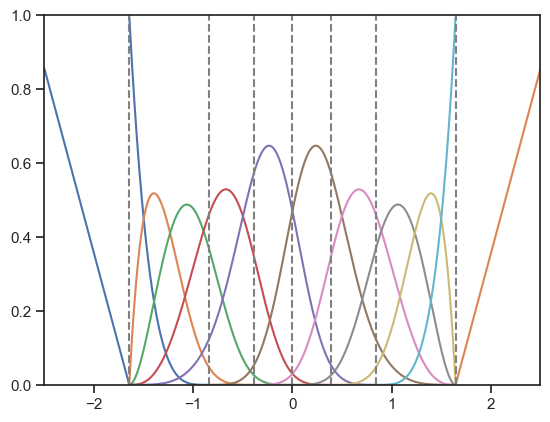

In [106]:

sns.set_theme()
sns.set_style("ticks")
for i in range(bases.shape[-1]):
    bases[bases == 0] = float('nan')
    if i < 10:
        idx = (bases[:, 0, i] > knot[0]+eps)  & (bases[:, 0, i] < knot[-1]-eps)
        plt.plot(x[idx, 0, 0], bases[idx, 0, i].T)
    else:
        plt.plot(x[:, 0, 0], bases[:, 0, i].T)
for k in knot:
    plt.axvline(k, color='gray', linestyle='--')
plt.xlim(-2.5, 2.5)
plt.ylim(0, 1)

plt.show()

In [31]:
dir = "../logs/type1/dkan/"

In [2]:
import os
import pandas as pd
import numpy as np

def analysis_results(dir):
    results_dirs = os.listdir(dir)
    results_test = []
    results_val = []
    for results_dir in results_dirs:
        file = os.path.join(dir, results_dir, "metrics.csv")
        tmp = pd.read_csv(file)
        results_val.append(tmp["val_loss"].min())
        results_test.append(tmp["test_loss"].min())
    print(np.round((np.min(results_val), np.mean(results_val)), 4))
    print(
    np.round((np.min(results_test), np.mean(results_test)), 4))

In [13]:
analysis_results("../logs/type1/KAN/csv-logs")
analysis_results("../logs/type1/DKAN/csv-logs")


[0.0101 0.0106]
[0.0101 0.0108]
[0.0103 0.0129]
[0.0103 0.0133]


In [16]:
analysis_results("../logs/type2/DKAN/csv-logs")
analysis_results("../logs/type2/KAN/csv-logs")

[0.0112 0.018 ]
[0.0108 0.0176]
[0.0143 0.0223]
[0.0144 0.0226]
